## CardioPy Example Analysis

In [1]:
# This is an example of how to conduct R peak detections and calculate HRV statistics with CardioPy
# The example data file contains high-frequency noise, as well as segments of missing data to demonstrate how to handle these datasets

# Updated 10-6-2020

In [1]:
# pick inline plotting or pop-out plots. We'll use inline plots here.

# inline plotting in jupyter
%matplotlib notebook

# uncomment for pop-out plots instead
# %matplotlib qt

In [4]:
import os

In [5]:
os.getcwd()
os.chdir('..')

'C:\\Users\\JackieGottshall\\Dropbox (Schiff Lab)\\HomemadePythonPackages\\cardiopy\\example_run'

In [7]:
# import the ekg module
from cardiopy import ekg

#### 1. Specify the data file name and location

In [ ]:
# NOTE: if using the example file, first download with curl

In [8]:
# name of csv file containing ekg data
fname = 'HCXXX_2001-01-01_awake_cycle1_epoch1_222000.csv'
# location of file
fpath = 'C:/Users/JackieGottshall/Downloads'
# location where output should be saved
savedir = 'C:/Users/JackieGottshall/Downloads'

#### 2. Create the EKG object and detect Rpeaks

In [9]:
# create the EKG object 'e' and detect peaks
# we'll set polarity to negative since our R-peaks deflect downwards
%time e = ekg.EKG(fname, fpath, polarity='negative', upshift=3.5, mw_size=100)

EKG successfully imported.
Calculating moving average with 100 ms window and a 3.5% upshift...
Detecting R peaks...
R peak detection complete
R-R intervals calculated
Wall time: 4.4 s


<IPython.core.display.Javascript object>


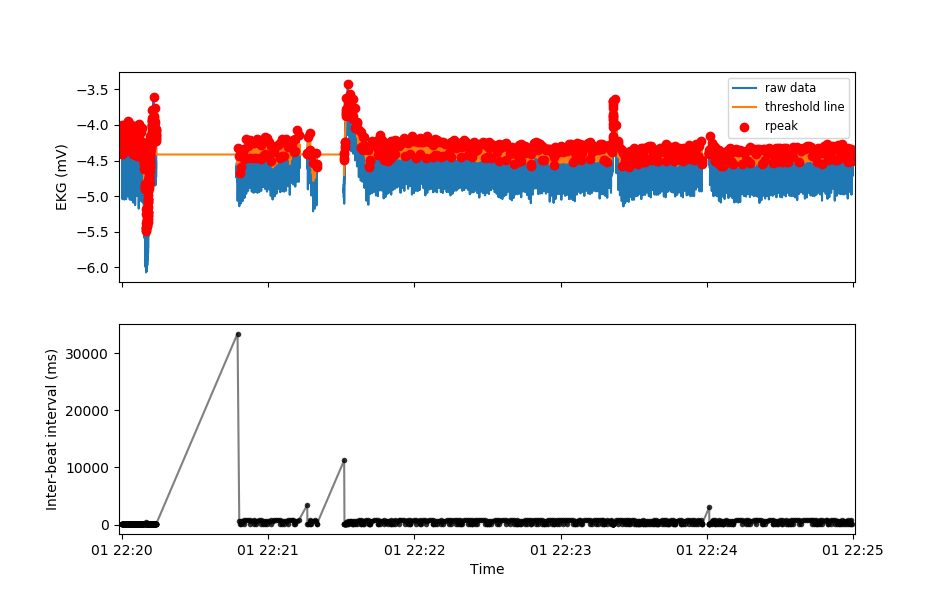

In [10]:
# visualise the detections. zoom in on regions by clicking the square icon and then selecting region
e.plotpeaks()

<IPython.core.display.Javascript object>


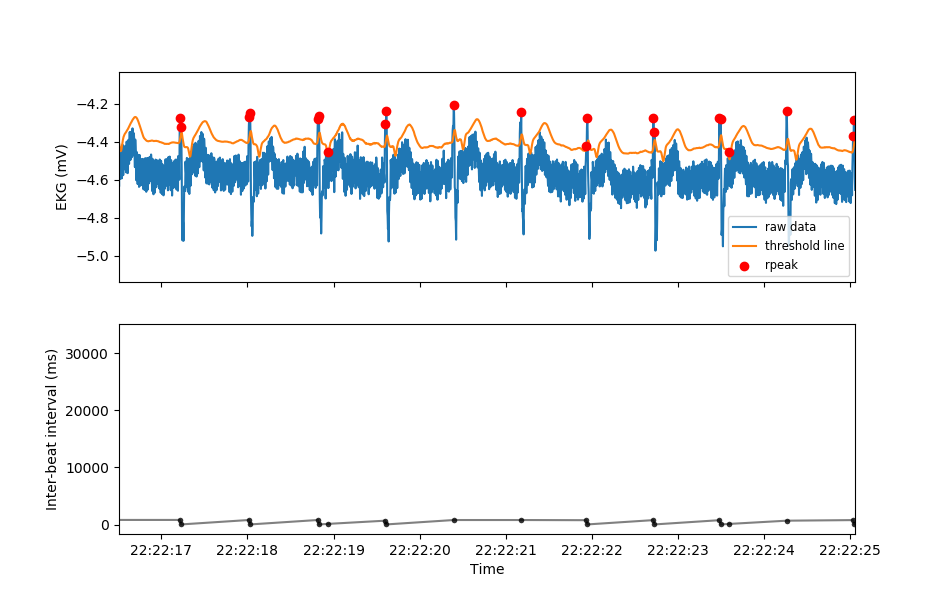

In [11]:
# zoomed in
e.plotpeaks()

In [12]:
# Our signal is noisey so we'll add the smoothing parameter with a 20ms window
%time e = ekg.EKG(fname, fpath, polarity='negative', upshift=3.5, mw_size=100, smooth = True, sm_wn = 20)

EKG successfully imported.
Calculating moving average with 100 ms window and a 3.5% upshift...
Detecting R peaks...
R peak detection complete
R-R intervals calculated
Wall time: 3.75 s


<IPython.core.display.Javascript object>


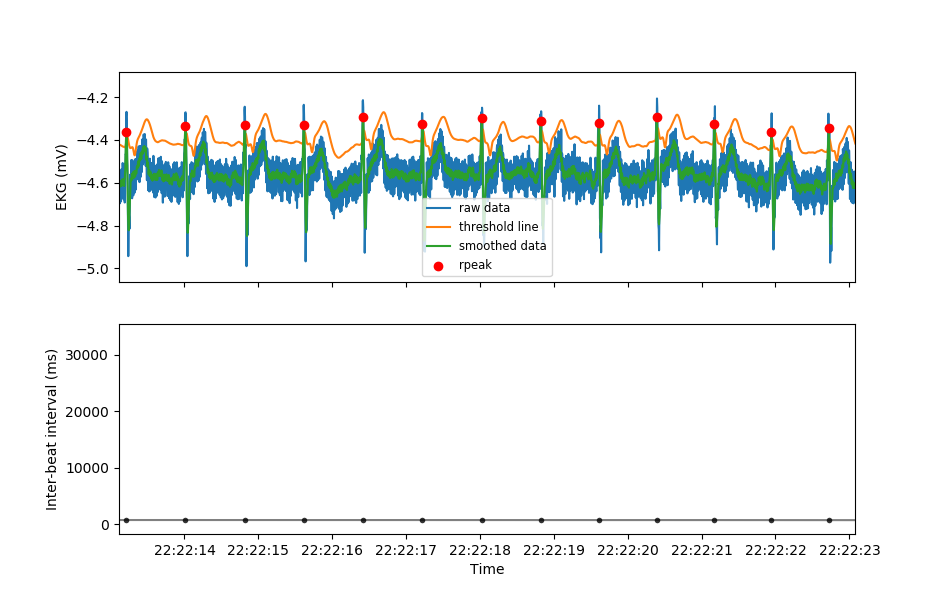

In [9]:
# inspect the changes - this looks better
e.plotpeaks()

#### 3. Remove any false detections

<IPython.core.display.Javascript object>


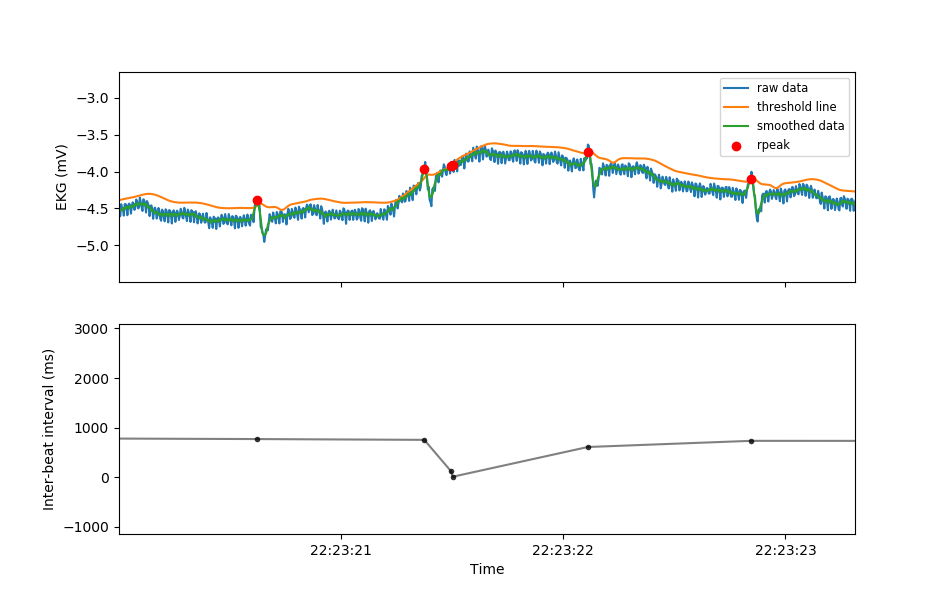

In [10]:
# examine peak detections - 2 false peaks found @ 22:23:21.5 (hover cursor over signal to get value in bottom corner)
e.plotpeaks()

In [13]:
# call the rm_peaks method with hh:mm:ss string to remove the false peak. the ibi_ms list corresponds to time of
# IBI leading up to R peak
e.rm_peak('22:23:21')

id 	 time 				 ibi_ms
1 	 2001-01-01 22:23:21.408000 	 752.0
2 	 2001-01-01 22:23:21.528000 	 120.0
3 	 2001-01-01 22:23:21.536000 	 8.0
Rpeaks to remove [list ids or None]: 2,3


R peak at  2001-01-01 22:23:21.528000  successfully removed.
R peak at  2001-01-01 22:23:21.536000  successfully removed.
ibi values recalculated.


<IPython.core.display.Javascript object>


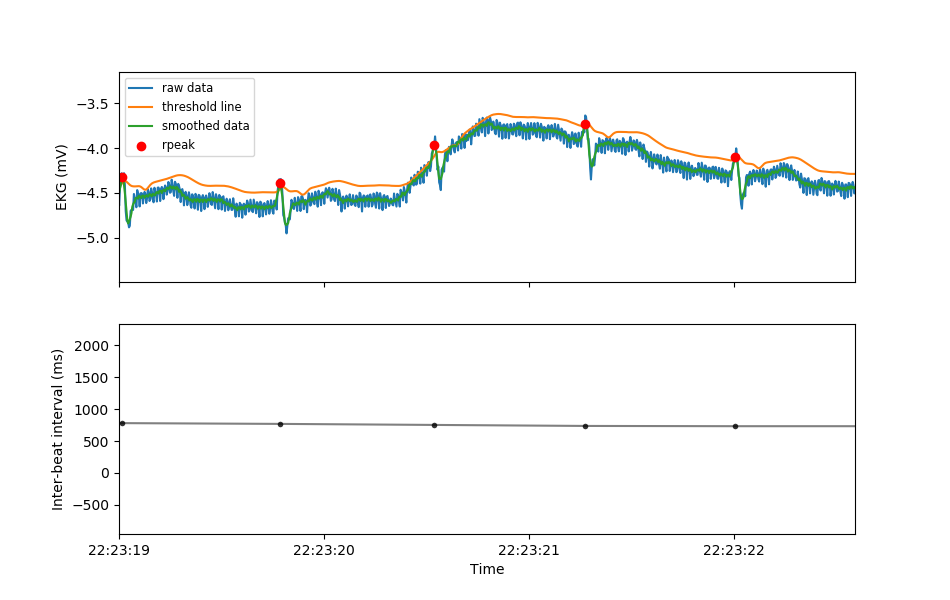

In [12]:
# re-plot to ensure that the correct peaks were removed
e.plotpeaks()

In [ ]:
# If the wrong peaks were removed, run e.undo_rm_peak() to undo & then e.plotpeaks() to examine
e.undo_rm_peak('22:23:21')

In [ ]:
# repeat as necessary

#### 4. Add any missed peaks

<IPython.core.display.Javascript object>


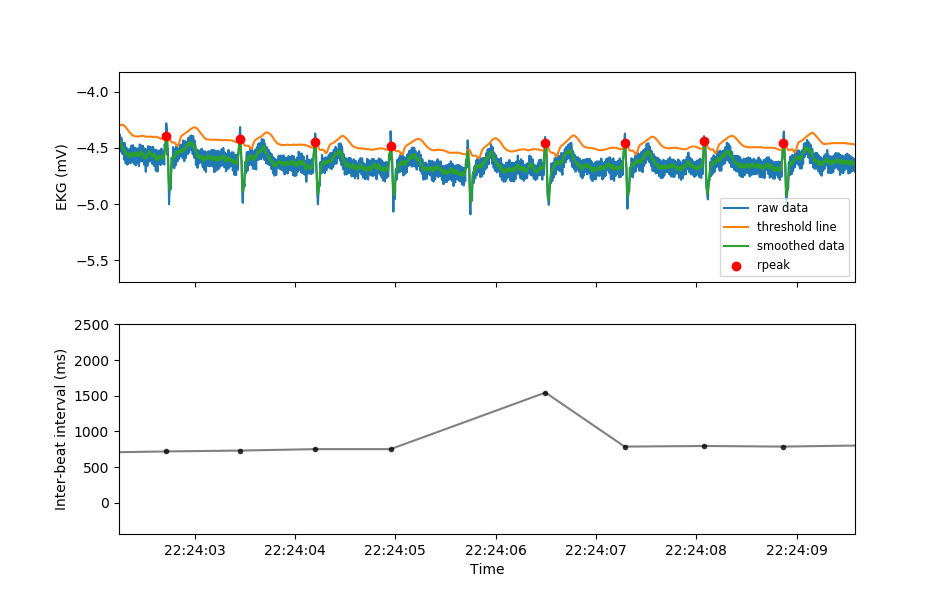

In [13]:
# 1. look at detections
e.plotpeaks()
# 2. use interaction at bottom right corner to see time of missed peaks
# 3. write down (on paper) millisecond range of missed peak
# 4. Close window when done using the off button in the top right.

In [14]:
# call add_peak method with the time value of the missed peak
e.add_peak('22:24:05')

## Note: This function takes a simple local maxima in the millisecond range specified. The range can be as large
##       as you want as long as the missed peak is the highest point in the range

Millisecond range of missed peak [min:max]: 650:850
New peak added.
ibi values recalculated.


<IPython.core.display.Javascript object>


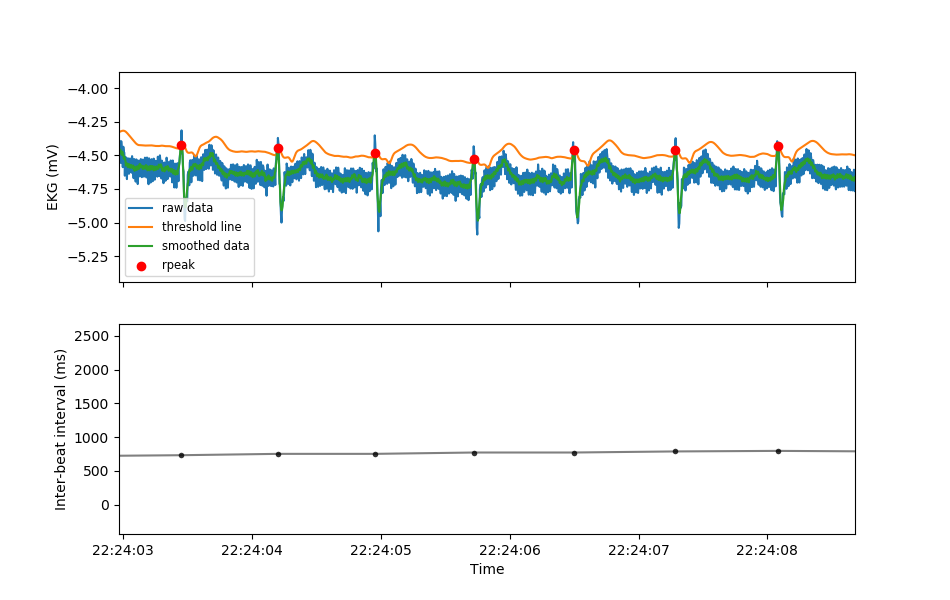

In [15]:
# check to make sure the peak was added in the correct position
e.plotpeaks()
# Close window when done using the off button in the top right.

In [ ]:
# if peak was added in the wrong position, use e.undo_add_peak() to undo
e.undo_add_peak('22:24:05')

In [ ]:
# repeat as necessary

In [15]:
e.add_peak('22:24:15')

Millisecond range of missed peak [min:max]: 200:400
New peak added.
ibi values recalculated.


In [16]:
e.add_peak('22:24:42')

Millisecond range of missed peak [min:max]: 500:650
New peak added.
ibi values recalculated.


In [17]:
e.add_peak('22:24:47')

Millisecond range of missed peak [min:max]: 150:350
New peak added.
ibi values recalculated.


#### 5. Remove IBIs from any missing data or abnormal beats

In [ ]:
# IBI removal MUST be done after all false peaks are removed and missed peaks added, or ibi values will be incorrect

<IPython.core.display.Javascript object>


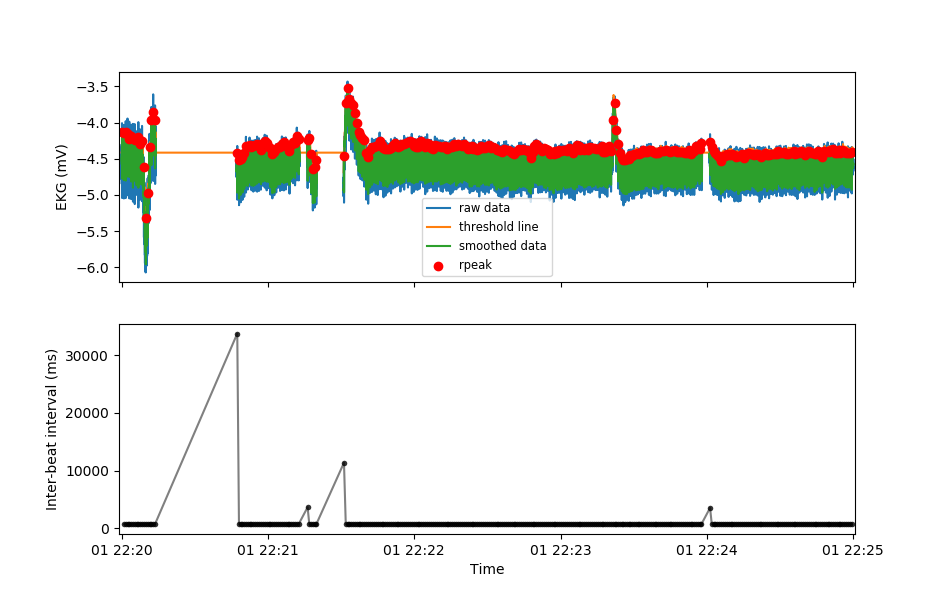

In [20]:
# inspect data for missing segments - we have a few in our dataset
e.plotpeaks()

In [18]:
# remove ibis that correspond to missing data with e.rm_ibi
# the thres parameter will automatically remove ibis greater than a given ms length
# manual removal can be used for all other false ibis. this can be done in one call or sequentially
e.rm_ibi(thres = 3000)

IBIs greater than 3000 milliseconds detected
Automatically remove? [y/n]: y
4 IBIs removed.
ibi_artifacts series updated.
R peaks dataframe updated.

Manually remove IBIs? [y/n]: n
Done.


<IPython.core.display.Javascript object>


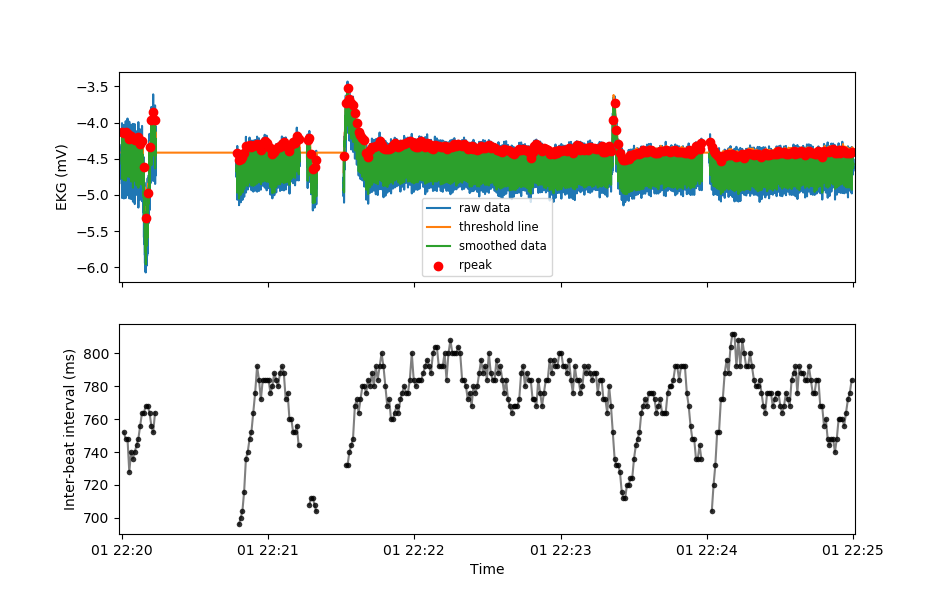

In [19]:
# inspect - looks good
e.plotpeaks()

In [ ]:
# Manually remove remaining false ibis - we don't have any left so we'll skip this step
e.rm_ibi()

In [ ]:
# inspect the data again to see if there are still false ibis present
e.plotpeaks()

#### 6. Once cleaning is complete, export data and analyze

In [20]:
e.export_RR(savedir)

Files will be saved to C:/Users/JackieGottshall/Downloads
R peak artifacts exported.
R peak additions exported.
R peaks exported.
IBI artifacts exported.
rr intervals exported.
nn intervals exported.
Done.


In [21]:
# Calculate time and frequency domain statistics using e.hrv_stats()
e.hrv_stats()

Calculating time domain statistics...
Time domain stats stored in obj.time_stats

Interpolating and resampling tachogram...
Calculating power spectrum...
Calculating frequency domain measures...
Frequency measures stored in obj.freq_stats

Done.


C:\Users\JackieGottshall\Dropbox (Schiff Lab)\HomemadePythonPackages\cardiopy\cardiopy\ekg.py:967: RuntimeWarning: Not adaptively combining the spectral estimators due to a low number of tapers (1 < 3).
  bandwidth=bandwidth, normalization='full', verbose=0)


<IPython.core.display.Javascript object>


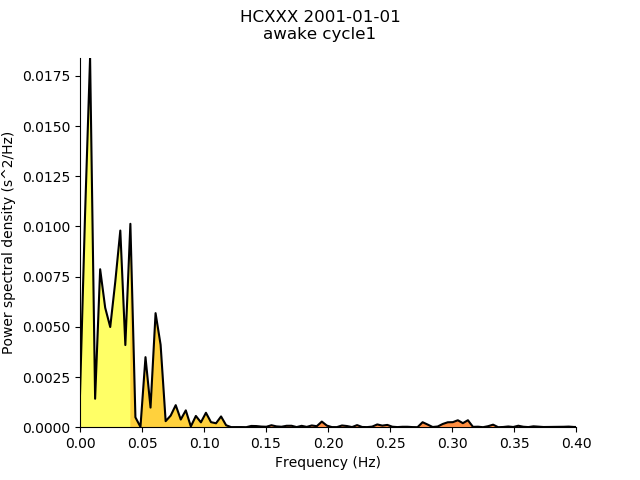

In [22]:
# plot Power spectrum and save figure
fig = e.plotPS(savedir = savedir)

In [23]:
# Save HRV statistics to a report
e.to_report(savedir)

Files will be saved to C:/Users/JackieGottshall/Downloads


In [24]:
# Export data to a spreadsheet
e.to_spreadsheet(spreadsheet = 'HRV_FullClean_Stats.csv', savedir = savedir)

Data added to HRV_FullClean_Stats.csv
